## Data analysis

In [1]:
# Molecular weights, LogP, HBA, HBD, and rotatable bonds
import pandas as pd
import numpy as np

from rdkit.Chem.Descriptors import CalcMolDescriptors
from rdkit.Chem import MolFromSmiles

def read_smiles(smiles_file: str):
    with open(smiles_file) as f:
        smiles = f.read().splitlines()
    return smiles

In [2]:
# pos_smiles = read_smiles("positives.smi")
# neg_smiles = read_smiles("negatives.smi")

# properties=["MolWt", "TPSA", "NumHAcceptors", "NumHDonors","NumRotatableBonds", "MolLogP"]

# data = []
# for smi in pos_smiles:
#     descs = CalcMolDescriptors(MolFromSmiles(smi))
#     selected_descs = [descs[k] for k in properties]
#     active = 1
#     data.append((smi, active, *selected_descs))

# for smi in neg_smiles:
#     descs = CalcMolDescriptors(MolFromSmiles(smi))
#     selected_descs = [descs[k] for k in properties]
#     active = 0
#     data.append((smi, active, *selected_descs))

# data = pd.DataFrame(data, columns=["smiles", "active"] + properties)
# data.to_csv("ligand_descriptors.csv", index=False)

/tmp/ipykernel_768560/2925686760.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np.concatenate([pos_data[properties].values, neg_data[properties].values], axis=1),


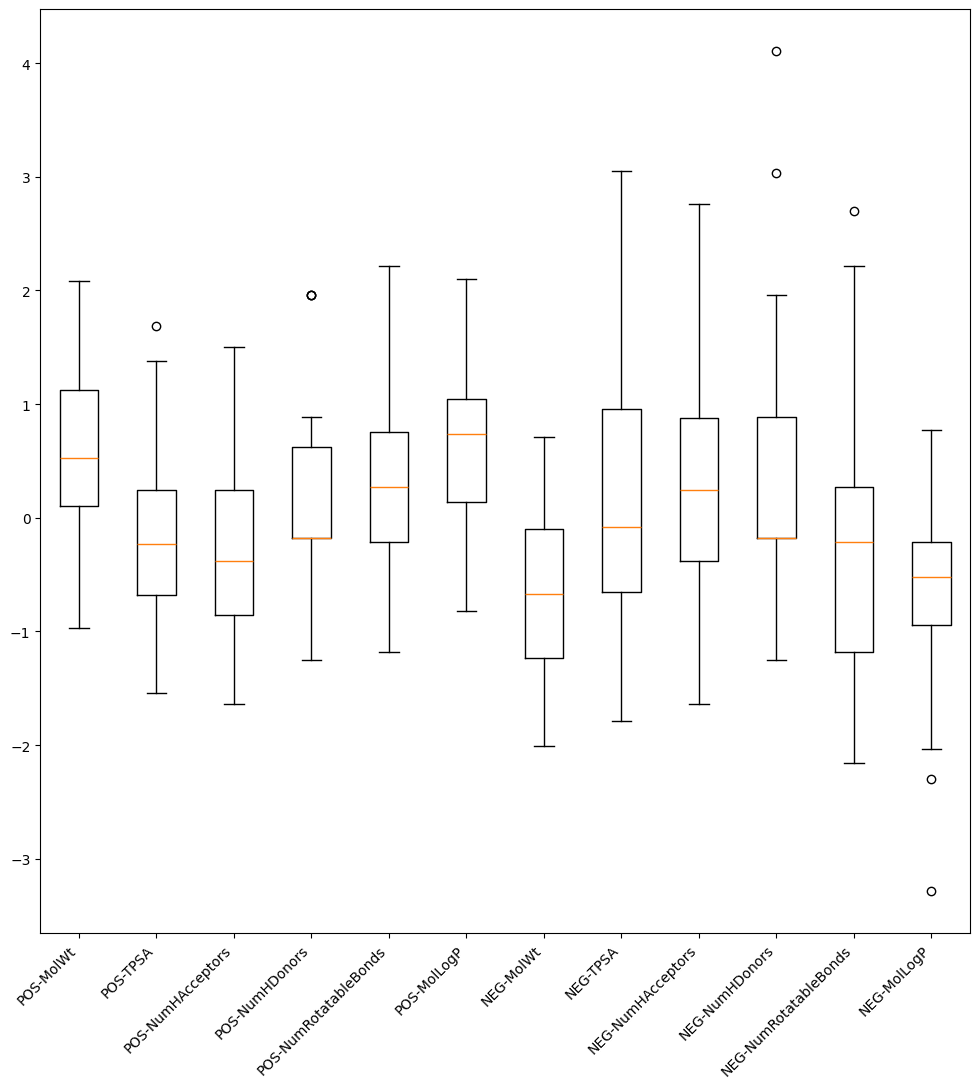

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

properties=["MolWt", "TPSA", "NumHAcceptors", "NumHDonors","NumRotatableBonds", "MolLogP"]
data = pd.read_csv("ligand_descriptors.csv")
data[properties] = (data[properties] - data[properties].mean()) / data[properties].std()
# data_min = data[properties].min()
# data_max = data[properties].max()
# data[properties] = (data[properties] - data_min) / (data_max - data_min)
pos_data = data[data.active == 1]
neg_data = data[data.active == 0]

plt.figure(figsize=(12, 12))
# plt.boxplot([pos_data[properties], neg_data[properties]], labels=["pos-"+p for p in properties], positions=[1, 2])
            # positions=[1, 2], labels=["Active", "Inactive"])
plt.boxplot(np.concatenate([pos_data[properties].values, neg_data[properties].values], axis=1),
            labels=["POS-"+p for p in properties] + ["NEG-"+p for p in properties])
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
data_max

MolWt                583.5410
TPSA                 133.2300
NumHAcceptors          9.0000
NumHDonors             5.0000
NumRotatableBonds     11.0000
MolLogP                7.9149
dtype: float64

In [18]:
import numpy as np
np.concatenate([pos_data[properties].values.T, neg_data[properties].values.T], axis=0).shape

(12, 50)

## TMscore of the protein structures